In The Name of Allah

Group3

Quera AI Bootcamp

User guide:
Each section is independent and can be run sperately, but uiitlity section must be run at least one time.

# Utility Functions

### Loading Data

In [1]:
# train data
!gdown --id 1pe4_HgXb9dctFGJXVNlyNcKSXZeht0lX

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1pe4_HgXb9dctFGJXVNlyNcKSXZeht0lX
From (redirected): https://drive.google.com/uc?id=1pe4_HgXb9dctFGJXVNlyNcKSXZeht0lX&confirm=t&uuid=946c87cd-6cac-4cfa-8543-32a2590333f5
To: /content/car_img-test.zip
100% 2.51G/2.51G [00:28<00:00, 89.4MB/s]


In [2]:
!unzip car_img-test.zip

Streaming output truncated to the last 5000 lines.
  inflating: test/day_08471.jpg      
  inflating: test/day_08471.xml      
  inflating: test/day_08473.jpg      
  inflating: test/day_08473.xml      
  inflating: test/day_08475.jpg      
  inflating: test/day_08475.xml      
  inflating: test/day_08477.jpg      
  inflating: test/day_08477.xml      
  inflating: test/day_08478.jpg      
  inflating: test/day_08478.xml      
  inflating: test/day_08487.jpg      
  inflating: test/day_08487.xml      
  inflating: test/day_08493.jpg      
  inflating: test/day_08493.xml      
  inflating: test/day_08494.jpg      
  inflating: test/day_08494.xml      
  inflating: test/day_08505.jpg      
  inflating: test/day_08505.xml      
  inflating: test/day_08519.jpg      
  inflating: test/day_08519.xml      
  inflating: test/day_08527.jpg      
  inflating: test/day_08527.xml      
  inflating: test/day_08528.jpg      
  inflating: test/day_08528.xml      
  inflating: test/day_08544.jpg      

In [3]:
# loading needed files from google drive
# https://drive.google.com/file/d/1a0if3jIVGO7s6FANP_hneAf4Xsl1Oppd/view?usp=sharing
!gdown --id 1a0if3jIVGO7s6FANP_hneAf4Xsl1Oppd

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1a0if3jIVGO7s6FANP_hneAf4Xsl1Oppd
To: /content/Data.zip
100% 5.65M/5.65M [00:00<00:00, 18.7MB/s]


In [4]:
!unzip Data.zip

Archive:  Data.zip
   creating: Data/
  inflating: Data/best_model.pt      
   creating: Data/dataset/
  inflating: Data/dataset/dataset.yaml  
   creating: Data/dataset/images/
   creating: Data/dataset/images/train/
   creating: Data/dataset/images/val/
   creating: Data/dataset/labels/
   creating: Data/dataset/labels/train/
   creating: Data/dataset/labels/val/
   creating: Data/preds/


### installing needed libs

In [5]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 879.0/879.0 kB 23.4 MB/s eta 0:00:00


In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import xml.etree.ElementTree as ET
import matplotlib.patches as patches
from transformers import MobileViTFeatureExtractor, MobileViTForSemanticSegmentation
from PIL import Image
import requests
from ultralytics import YOLO, checks
import cv2
import os
import shutil

def process_xml(xml_file):
    """
    Parses the XML file and calls print_xml on the root element.
    """
    tree = ET.parse(xml_file)
    root = tree.getroot()
    return root

def print_xml(element, indent=0):
    print(' ' * indent + f"{element.tag}: {element.text.strip() if element.text else ''}")
    for child in element:
        print_xml(child, indent + 2)

def print_element(element, indent=0):
    print(' ' * indent + f"{element.tag}: {element.text.strip() if element.text else ''}")
    for child in element:
        print_xml(child, indent + 2)

def extract_plate(xml_file, target_name="کل ناحیه پلاک"):
    # Parse the XML file
    tree = ET.parse(xml_file)
    root = tree.getroot()

    # Iterate over all 'object' elements
    for obj in root.findall("object"):
        name = obj.find("name").text

        # Check if the object name matches the target
        if name == target_name:
            # Extract and return the bounding box coordinates as a dictionary
            bnd_box = {
                "xmin": int(obj.find("bndbox/xmin").text),
                "ymin": int(obj.find("bndbox/ymin").text),
                "xmax": int(obj.find("bndbox/xmax").text),
                "ymax": int(obj.find("bndbox/ymax").text)
            }
            return bnd_box

    # If no match found, return None
    return None

def draw_image(car_img, plate_xml=None, plate=None):
  img = mpimg.imread(car_img)  # Replace with your image file path
  fig, ax = plt.subplots()
  ax.imshow(img)

  if(plate_xml):
    coords = extract_plate(plate_xml)
    width = coords['xmax'] - coords['xmin']
    height = coords['ymax'] - coords['ymin']
    rect = patches.Rectangle((coords['xmin'], coords['ymin']), width, height,
                         linewidth=2, edgecolor='green', facecolor='none')
    ax.add_patch(rect)

  if(plate):
    width2 = plate['xmax'] - plate['xmin']
    height2 = plate['ymax'] - plate['ymin']
    rect2 = patches.Rectangle((plate['xmin'], plate['ymin']), width2, height2,
                         linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(rect2)

  plt.axis('off')  # Optional: Hide axes
  plt.show()

def draw_image2(car_img, plate=None):
  img = mpimg.imread(car_img)  # Replace with your image file path
  fig, ax = plt.subplots()
  ax.imshow(img)

  if(plate):
    width = plate['xmax'] - plate['xmin']
    height = plate['ymax'] - plate['ymin']
    rect = patches.Rectangle((plate['xmin'], plate['ymin']), width, height,
                         linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(rect)

  plt.axis('off')  # Optional: Hide axes
  plt.show()

def prepare_image(car_img):
  # do some stuff with car_img: resize
  return car_img

def detect_plate(img_dir, model=None):
  # img_raw = mpimg.imread(img_dir)  # Replace with your image file path
  # img_standard = prepare_image(img_raw)
  img_standard = mpimg.imread(img_dir)

  if(model == None):
    model = YOLO("yolov8n.pt")
  # Perform inference
  results = model(img_standard)

  # Display bounding boxes and coordinates
  for result in results:
      for box in result.boxes:
          # Extract coordinates of the bounding box
          xmin, ymin, xmax, ymax = box.xyxy[0]  # YOLO outputs in xyxy format

          # Convert coordinates to integers
          xmin, ymin, xmax, ymax = map(int, [xmin, ymin, xmax, ymax])

          # Draw bounding box on the image
          image_copy = img_standard.copy()
          # cv2.rectangle(image_copy, (x1, y1), (x2, y2), color, thickness)

          cv2.rectangle(image_copy, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)

          # Print coordinates
          print(f"Plate coordinates: xmin={xmin}, ymin={ymin}, xmax={xmax}, ymax={ymax}")

  plate = {
      'xmin': xmin,
      'xmax': xmax,
      'ymin': ymin,
      'ymax': ymax
  }

  # if there is a model, use it to detet plate
  return plate

  import os
import xml.etree.ElementTree as ET



def convert_xml_to_yolo_format(xml_folder, output_folder):
  '''
  script for converting xml to text files
  '''
  if not os.path.exists(output_folder):
    os.makedirs(output_folder)

  for xml_file in os.listdir(xml_folder):
      if xml_file.endswith('.xml'):
          tree = ET.parse(os.path.join(xml_folder, xml_file))
          root = tree.getroot()

          # Assuming the image filename is in the XML file
          image_filename = root.find('filename').text
          yolo_labels = []

          for obj in root.findall('object'):
              name = obj.find('name').text
              if name == "کل ناحیه پلاک":  # Adjust as needed for your specific class
                  # Get bounding box coordinates
                  bndbox = obj.find('bndbox')
                  # Convert to float first, then to int
                  xmin = int(float(bndbox.find('xmin').text))
                  ymin = int(float(bndbox.find('ymin').text))
                  xmax = int(float(bndbox.find('xmax').text))
                  ymax = int(float(bndbox.find('ymax').text))

                  # YOLO format: class_id x_center y_center width height
                  class_id = 0  # Change to the appropriate class ID for your dataset
                  yolo_labels.append(f"{class_id} {xmax} {ymax} {xmin} {ymin}")

          # Save YOLO labels to a .txt file
          yolo_label_file = os.path.join(output_folder, f"{os.path.splitext(image_filename)[0]}.txt")
          with open(yolo_label_file, 'w') as f:
              f.write("\n".join(yolo_labels))



def move_jpg_files(src_dir, dest_dir, verbose=True):
    """
    Moves .jpg files from the source directory to the destination directory,
    excluding files with 'night' in their filenames.

    Args:
    - src_dir (str): The source directory containing the files to move.
    - dest_dir (str): The destination directory where files will be moved.
    - verbose (bool): If True, prints the names of moved and skipped files.
    """
    # Create destination directory if it doesn't exist
    os.makedirs(dest_dir, exist_ok=True)

    # Iterate over files in the source directory
    for filename in os.listdir(src_dir):
        # Check if the file is a .jpg and does not contain 'night'
        if filename.endswith('.jpg') and 'night' not in filename:

            # Remove "day_" from the filename if it exists
            new_filename = filename.replace("day_", "")

            # Construct full file path
            src_file = os.path.join(src_dir, filename)
            dest_file = os.path.join(dest_dir, new_filename)

            # Move the file
            shutil.move(src_file, dest_file)
            if verbose:
                print(f'Moved: {filename} -> {new_filename}')
        else:
            if verbose:
                print(f'Skipped: {filename}')


def save_annotated_image(image_path, predictions, output_path):
    """
    Draws bounding boxes on the image and saves it.

    Args:
    - image_path (str): Path to the original image.
    - predictions: Results from the model's prediction.
    - output_path (str): Path to save the annotated image.
    """
    image = cv2.imread(image_path)

    # Accessing bounding box information from predictions
    for *xyxy, conf, cls in predictions[0].boxes.data:
        xmin, ymin, xmax, ymax = map(int, xyxy)

        # Draw rectangle and label on the image
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
        label = f"{int(cls)}: {conf:.2f}"  # Convert class ID to integer
        cv2.putText(image, label, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # # Save annotated image
    # cv2.imwrite(output_path, image)
    # print(f"Annotated image saved to {output_path}")

    success = cv2.imwrite(output_path, image)
    if success:
        print(f"Annotated image saved to {output_path}")
    else:
        print(f"Error: Unable to save image at {output_path}")


def save_blurred_image(image_path, predictions, output_path):
    """
    Blurs the detected plates in the image and saves it.

    Args:
    - image_path (str): Path to the original image.
    - predictions: Results from the model's prediction.
    - output_path (str): Path to save the blurred image.
    """
    # Load the original image
    image = cv2.imread(image_path)

    # Accessing bounding box information from predictions
    for *xyxy, conf, cls in predictions[0].boxes.data:
        xmin, ymin, xmax, ymax = map(int, xyxy)

        # Extract the plate region and apply a blur
        plate_region = image[ymin:ymax, xmin:xmax]
        blurred_plate = cv2.GaussianBlur(plate_region, (51, 51), 30)

        # Replace the original plate region with the blurred version
        image[ymin:ymax, xmin:xmax] = blurred_plate

    # Save the final image with blurred plates
    success = cv2.imwrite(output_path, image)
    if success:
        print(f"Blurred image saved to {output_path}")
    else:
        print(f"Error: Unable to save image at {output_path}")


def process_folder(input_folder, output_folder, model):
    """
    Processes all images in the input folder by blurring detected plates
    and saving them in the output folder.

    Args:
    - input_folder (str): Path to the folder with original images.
    - output_folder (str): Path to save the processed images.
    - model: The trained YOLO model for making predictions.
    """
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Process each image in the input folder
    for image_name in os.listdir(input_folder):
        image_path = os.path.join(input_folder, image_name)

        # Ensure we're only processing image files
        if not image_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            continue

        # Perform prediction on the image
        predictions = model.predict(image_path)

        # Define the path to save the processed image
        output_path = os.path.join(output_folder, image_name)

        # Call the function to blur the plate and save the image
        save_blurred_image(image_path, predictions, output_path)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# Loading and Knowing Data

### Explore data

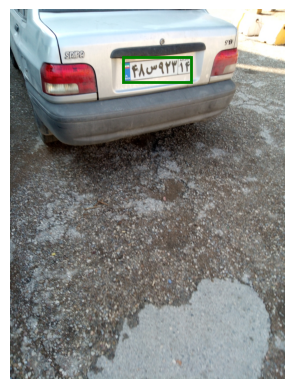

In [7]:
draw_image('test/day_08471.jpg', 'test/day_08471.xml')

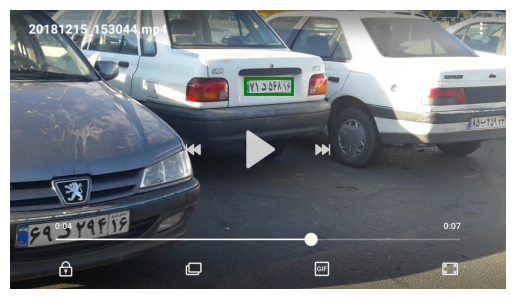

In [8]:
draw_image('test/day_14876.jpg', 'test/day_14876.xml')


# Testing Basic Model

100%|██████████| 6.25M/6.25M [00:00<00:00, 141MB/s]



0: 640x480 1 car, 42.0ms
Speed: 25.4ms preprocess, 42.0ms inference, 838.5ms postprocess per image at shape (1, 3, 640, 480)
Plate coordinates: xmin=6, ymin=1, xmax=792, ymax=478


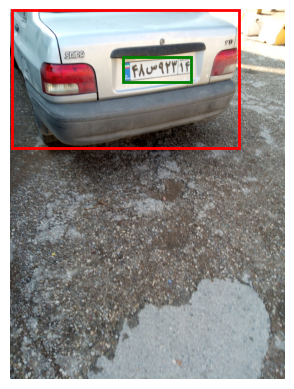

In [9]:
plate = detect_plate('test/day_08471.jpg')
draw_image('test/day_08471.jpg', 'test/day_08471.xml',plate)


0: 384x640 2 cars, 3 trucks, 97.1ms
Speed: 1.8ms preprocess, 97.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)
Plate coordinates: xmin=1, ymin=23, xmax=497, ymax=597
Plate coordinates: xmin=638, ymin=3, xmax=1279, ymax=406
Plate coordinates: xmin=637, ymin=3, xmax=1279, ymax=408
Plate coordinates: xmin=170, ymin=1, xmax=828, ymax=377
Plate coordinates: xmin=185, ymin=3, xmax=1279, ymax=409


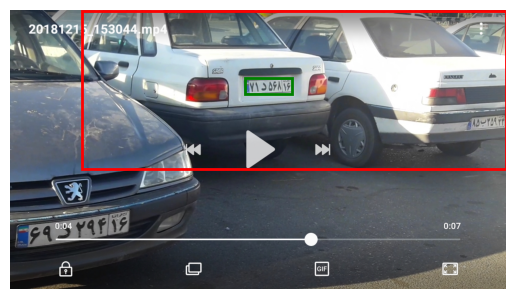

In [10]:
plate = detect_plate('test/day_14876.jpg')
draw_image('test/day_14876.jpg', 'test/day_14876.xml',plate)

# Train Simple Model

in this section we train a simple simple model using a small dataset.
by default training is disabled and we use best wights of our previous trainings. but it can be run tested again.

In [11]:
# set if we need new training or we use pre trained weights
need_new_train = False

In [12]:
# dataset
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="bdFsYHcb9P7HbtDgxGOT")
project = rf.workspace("mochoye").project("license-plate-detector-ogxxg")
version = project.version(2)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.6 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to License-Plate-Detector-2 in yolov8:: 100%|██████████| 802/802 [00:00<00:00, 5049.09it/s]


In [7]:
# train simple basic model
if(need_new_train):
  simple_model = YOLO('yolov8n.pt')
  simple_model.train(
      data='/content/License-Plate-Detector-2/data.yaml',  # Update to your dataset path
      epochs=10,
      imgsz=640,
      batch=16,
      name='simple_model',
      save=True,
  )

100%|██████████| 6.25M/6.25M [00:00<00:00, 95.4MB/s]


Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/License-Plate-Detector-2/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=simple_model, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sh

100%|██████████| 755k/755k [00:00<00:00, 18.2MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 73.8MB/s]


AMP: checks passed ✅


train: Scanning /content/License-Plate-Detector-2/train/labels... 277 images, 0 backgrounds, 0 corrupt: 100%|██████████| 277/277 [00:00<00:00, 2057.52it/s]

train: New cache created: /content/License-Plate-Detector-2/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/License-Plate-Detector-2/valid/labels... 81 images, 0 backgrounds, 0 corrupt: 100%|██████████| 81/81 [00:00<00:00, 1194.73it/s]

val: New cache created: /content/License-Plate-Detector-2/valid/labels.cache


Plotting labels to runs/detect/simple_model/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/simple_model
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.24G      1.111      3.296      1.217          5        640: 100%|██████████| 18/18 [00:07<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]

                   all         81         81    0.00333          1      0.805      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10       2.2G     0.9647      2.069      1.034          5        640: 100%|██████████| 18/18 [00:06<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.96it/s]

                   all         81         81    0.00333          1      0.906      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.21G     0.9457      1.958      1.044          5        640: 100%|██████████| 18/18 [00:03<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.00it/s]

                   all         81         81      0.921      0.718      0.889       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.21G     0.9179      1.827      1.041          5        640: 100%|██████████| 18/18 [00:05<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]

                   all         81         81      0.823      0.728      0.797      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.21G     0.9353      1.692      1.039          5        640: 100%|██████████| 18/18 [00:03<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.31it/s]

                   all         81         81      0.917      0.741      0.868      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.21G     0.8889      1.576       1.04          5        640: 100%|██████████| 18/18 [00:03<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]

                   all         81         81      0.891      0.912      0.963      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.21G     0.8765      1.489      1.031          5        640: 100%|██████████| 18/18 [00:05<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]

                   all         81         81      0.895      0.947      0.964      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.21G     0.8409      1.327     0.9828          5        640: 100%|██████████| 18/18 [00:03<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.08it/s]

                   all         81         81      0.974      0.941      0.985      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.21G     0.7838      1.235     0.9883          5        640: 100%|██████████| 18/18 [00:05<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.18it/s]

                   all         81         81      0.962      0.951      0.982      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.21G     0.7472      1.175     0.9546          5        640: 100%|██████████| 18/18 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.94it/s]

                   all         81         81      0.941      0.984      0.985      0.816



10 epochs completed in 0.021 hours.
Optimizer stripped from runs/detect/simple_model/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/simple_model/weights/best.pt, 6.2MB

Validating runs/detect/simple_model/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]


                   all         81         81      0.941      0.984      0.985      0.816
Speed: 0.2ms preprocess, 2.3ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to runs/detect/simple_model


In [13]:
if(not need_new_train):
  simple_model = YOLO('/content/Data/best_model.pt')


image 1/1 /content/test/day_08471.jpg: 640x480 1 LicensePlate, 16.4ms
Speed: 4.0ms preprocess, 16.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)
Annotated image saved to /content/Data/preds/day_08471_pred.jpg


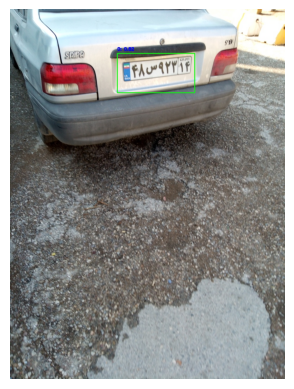

In [14]:
test1 = 'test/day_08471.jpg'
output_folder = '/content/Data/preds'
pred1 = os.path.join(output_folder, 'day_08471_pred.jpg')

result = simple_model.predict(test1)
save_annotated_image(test1, result, pred1)
draw_image(pred1)


image 1/1 /content/test/day_00019.jpg: 640x480 1 LicensePlate, 214.2ms
Speed: 4.1ms preprocess, 214.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)
Annotated image saved to /content/Data/preds/day_00019_pred.jpg


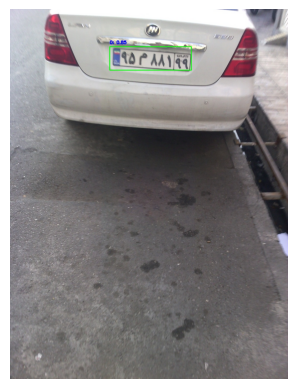

In [39]:
test2 = 'test/day_00019.jpg'
output_folder = '/content/Data/preds'
pred2 = os.path.join(output_folder, 'day_00019_pred.jpg')

result = simple_model.predict(test2)
save_annotated_image(test2, result, pred2)
draw_image(pred2)


image 1/1 /content/test/day_14876.jpg: 384x640 2 LicensePlates, 157.3ms
Speed: 3.3ms preprocess, 157.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
Annotated image saved to /content/Data/preds/day_14876_pred.jpg


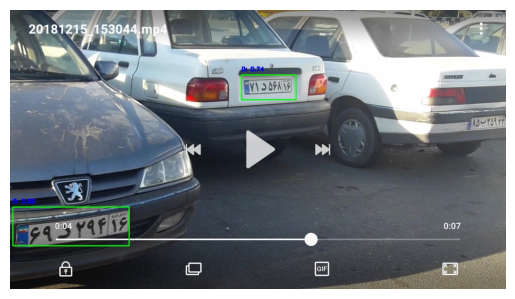

In [40]:
# day_14876
test3 = 'test/day_14876.jpg'
output_folder = '/content/Data/preds'
pred3 = os.path.join(output_folder, 'day_14876_pred.jpg')

result3 = simple_model.predict(test3)
save_annotated_image(test3, result3, pred3)
draw_image(pred3)

# Final Test using Trained Model

final model is set to best weights we achieved

In [15]:
# set the final model
final_model = YOLO('/content/Data/best_model.pt')


In [16]:
# final test
!gdown --id 1DNIMupbXUhO_ifc_q4GBtRW4hFyTaZdt

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1DNIMupbXUhO_ifc_q4GBtRW4hFyTaZdt
From (redirected): https://drive.google.com/uc?id=1DNIMupbXUhO_ifc_q4GBtRW4hFyTaZdt&confirm=t&uuid=52848ee4-8d02-4d12-ac1d-facbb837f991
To: /content/final_test.zip
100% 46.2M/46.2M [00:00<00:00, 77.3MB/s]


In [17]:
!mkdir /content/final && mkdir /content/final/test && mkdir /content/final/result
!unzip final_test.zip -d /content/final/test

Archive:  final_test.zip
  inflating: /content/final/test/day_00026.png  
  inflating: /content/final/test/__MACOSX/._day_00026.png  
  inflating: /content/final/test/day_00027.png  
  inflating: /content/final/test/__MACOSX/._day_00027.png  
  inflating: /content/final/test/day_00028.png  
  inflating: /content/final/test/__MACOSX/._day_00028.png  
  inflating: /content/final/test/day_00029.png  
  inflating: /content/final/test/__MACOSX/._day_00029.png  
  inflating: /content/final/test/day_00030.png  
  inflating: /content/final/test/__MACOSX/._day_00030.png  
  inflating: /content/final/test/day_00020.png  
  inflating: /content/final/test/__MACOSX/._day_00020.png  
  inflating: /content/final/test/day_00021.png  
  inflating: /content/final/test/__MACOSX/._day_00021.png  
  inflating: /content/final/test/day_00022.png  
  inflating: /content/final/test/__MACOSX/._day_00022.png  
  inflating: /content/final/test/day_00023.png  
  inflating: /content/final/test/__MACOSX/._day_00023.

In [18]:
# Paths to Final Test folders
input_folder = '/content/final/test'
output_folder = '/content/final/result'

# Call the function to process all images
process_folder(input_folder, output_folder, final_model)


image 1/1 /content/final/test/day_00002.png: 480x640 1 LicensePlate, 34.2ms
Speed: 2.0ms preprocess, 34.2ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)
Blurred image saved to /content/final/result/day_00002.png

image 1/1 /content/final/test/day_00017.png: 640x480 (no detections), 7.6ms
Speed: 2.0ms preprocess, 7.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)
Blurred image saved to /content/final/result/day_00017.png

image 1/1 /content/final/test/day_00015.png: 640x480 1 LicensePlate, 10.6ms
Speed: 2.7ms preprocess, 10.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)
Blurred image saved to /content/final/result/day_00015.png

image 1/1 /content/final/test/day_00030.png: 640x480 1 LicensePlate, 7.7ms
Speed: 2.3ms preprocess, 7.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)
Blurred image saved to /content/final/result/day_00030.png

image 1/1 /content/final/test/day_00021.png: 640x480 1 LicensePlate, 8

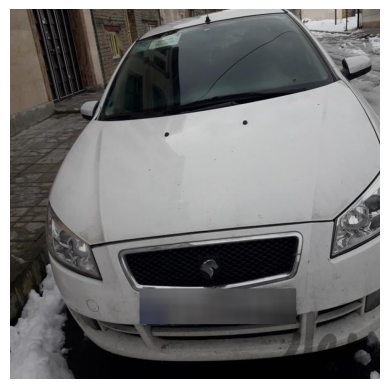

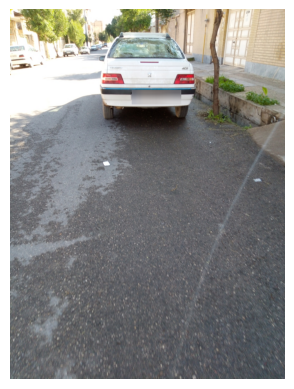

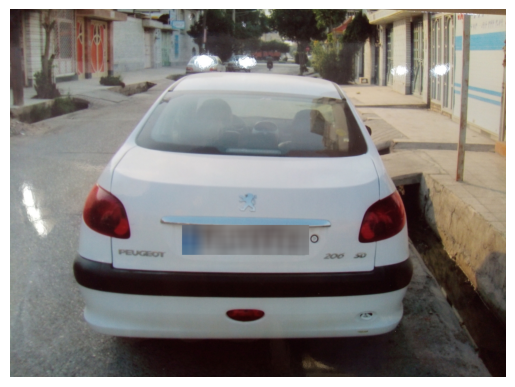

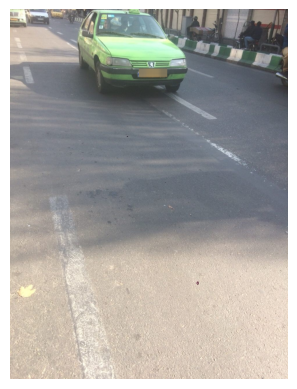

In [19]:
# show some cases:
test_imgs = ['/content/final/result/day_00001.png',
             '/content/final/result/day_00005.png',
             '/content/final/result/day_00020.png',
             '/content/final/result/day_00030.png',
             ]

for img in test_imgs:
  draw_image(img)